In [61]:
!pip install opencv-python matplotlib torch torchvision ultralytics



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [85]:
def detect_vehicles(image_path, model_path="yolov8n.pt"):
    import cv2
    from matplotlib import pyplot as plt
    import pandas as pd
    from ultralytics import YOLO

    
    model = YOLO(model_path)

    
    results = model(image_path)
    result = results[0]  


    vehicle_classes = ['car', 'motorcycle', 'bus', 'truck']
    for box in result.boxes:
        cls = result.names[int(box.cls)]
        conf = float(box.conf)
        print(f"Detected: {cls} (conf={conf:.2f})")


    # Filter vehicles
    vehicle_boxes = []
    for box in result.boxes:
        cls = result.names[int(box.cls)]
        if cls in vehicle_classes:
            vehicle_boxes.append(box)

    
    vehicle_image = result.orig_img.copy()
    for box in vehicle_boxes:
        cls = result.names[int(box.cls)]
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        cv2.rectangle(vehicle_image, (x1, y1), (x2, y2), (0, 0, 255), 2)
        cv2.putText(vehicle_image, cls, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

    # Convert BGR -> RGB for plottin
    vehicle_image_rgb = cv2.cvtColor(vehicle_image, cv2.COLOR_BGR2RGB)

    # Display annotated image
    plt.imshow(vehicle_image_rgb)
    plt.axis('off')
    plt.show()

    # Count vehicles and store coordinates
    vehicle_data = []
    for box in vehicle_boxes:
        cls = result.names[int(box.cls)]
        x1, y1, x2, y2 = box.xyxy[0].tolist()
        vehicle_data.append([cls, x1, y1, x2, y2])

    print(f"Total vehicles detected: {len(vehicle_data)}")

    # Save annotated image and CSV
    cv2.imwrite("annotated_street_image.jpg", vehicle_image)
    df = pd.DataFrame(vehicle_data, columns=['Vehicle_Type', 'X1', 'Y1', 'X2', 'Y2'])
    df.to_csv("vehicle_data.csv", index=False)

    # Plot vehicle type counts
    type_counts = df['Vehicle_Type'].value_counts()
    type_counts = type_counts.reindex(vehicle_classes,fill_value=0)
    plt.bar(type_counts.index, type_counts.values, color='skyblue')
    plt.title("Vehicle Counts by Type")
    plt.xlabel("Vehicle Type")
    plt.ylabel("Count")
    plt.show()

    return df  # return the vehicle DataFrame



image 1/1 C:\Users\MULTI 88 G\Downloads\AiProject\street_Image6.jpeg: 448x640 5 cars, 4 trucks, 144.8ms
Speed: 5.4ms preprocess, 144.8ms inference, 2.7ms postprocess per image at shape (1, 3, 448, 640)
Detected: truck (conf=0.87)
Detected: car (conf=0.85)
Detected: car (conf=0.56)
Detected: truck (conf=0.52)
Detected: car (conf=0.43)
Detected: car (conf=0.38)
Detected: truck (conf=0.37)
Detected: truck (conf=0.35)
Detected: car (conf=0.26)


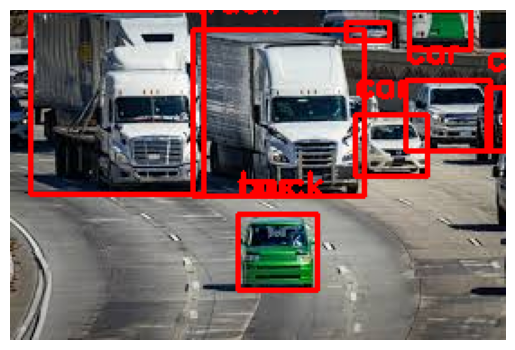

Total vehicles detected: 9


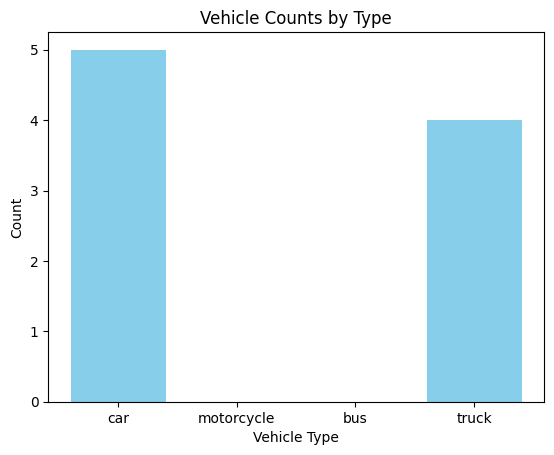

In [86]:
# Just call this for any image
vehicle_df = detect_vehicles("street_Image6.jpeg")
